In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import matplotlib.patches as patches

In [13]:
R_collision = 0.01
st_max = 10

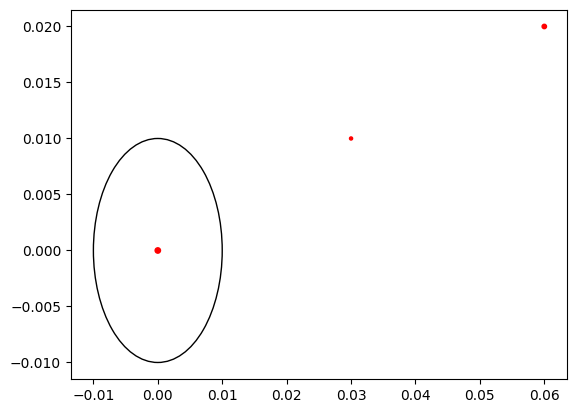

In [27]:
xp0 = 0.0
yp0 = 0.0
xp1 = 0.03
yp1 = 0.01
xp2 = 0.06
yp2 = 0.02
plt.scatter([xp0, xp1, xp2], [yp0, yp1, yp2], c='r', s=[15,5,10])
plt.gca().add_patch(patches.Circle((xp0, yp0), R_collision, fill=False))

(-0.1, 0.1)

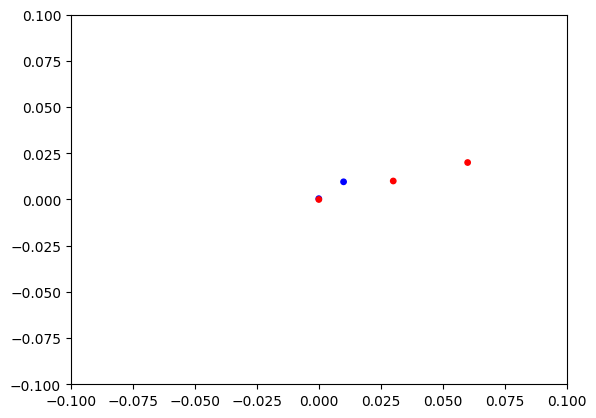

In [36]:

df = np.array([[0, xp0, yp0, 0.01, 0.01, 11], [1, xp1, yp1, -0.01, 0, 1], [2, xp2, yp2, 0, 0, 4]])
bubble_row = df[0].copy()
neighbor_rows = df

kd_tree = sp.spatial.KDTree(df[:, 1:3])
min_dist, min_idx = kd_tree.query(bubble_row[1:3], k=[2]) 
partner_ID = neighbor_rows[min_idx[0], 0]

partner_row = df[min_idx[0]].copy()

# collision but not coalescence
# perfect elastic collision assumption
if bubble_row[5] > st_max or partner_row[5] > st_max:
    delta_r = bubble_row[1:3] - partner_row[1:3]
    delta_v = bubble_row[3:5] - partner_row[3:5]
    d = np.inner(delta_r, delta_v) ** 2 - np.inner(delta_v, delta_v) * (np.inner(delta_r, delta_r) - 4 *R_collision ** 2)
    
    if d < 0 or np.inner(delta_r, delta_v) >= 0:
        print('no collision')
    
    else:
        J = 2 * (bubble_row[5] ** 1.5)* (partner_row[5] ** 1.5) * np.inner(delta_r, delta_v) / (R_collision * (bubble_row[5] ** 1.5 + partner_row[5] ** 1.5))
        bubble_row[3:5] = bubble_row[3:5] - J * (delta_r / R_collision) / bubble_row[5] ** 1.5
        partner_row[3:5] = partner_row[3:5] + J * (delta_r / R_collision) / partner_row[5] ** 1.5

        bubble_row[1] = bubble_row[3] * R_collision/ ((np.abs(bubble_row[3]) + np.abs(partner_row[3])))
        bubble_row[2] = bubble_row[4] * R_collision/ ((np.abs(bubble_row[4]) + np.abs(partner_row[4])))
        partner_row[1] = partner_row[3] * R_collision/ ((np.abs(bubble_row[3]) + np.abs(partner_row[3])))
        partner_row[2] = partner_row[4] * R_collision/ ((np.abs(bubble_row[4]) + np.abs(partner_row[4])))
        

plt.scatter([bubble_row[1], partner_row[1]], [bubble_row[2], partner_row[2]], c='b', s=[15,15])
plt.scatter(df[:, 1], df[:, 2], c='r', s=[15,15,15])
plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.1)

In [37]:
print(bubble_row[1:3], df[0, 1:3])

[-3.01279423e-05  4.39554074e-04] [0. 0.]
